In [1]:
#%pip install SimpleITK
#%pip install ipympl
#%pip install scikit-learn
#%pip install nibabel
#%pip install pandas
#%matplotlib widget
#%pip install tqdm
#%pip install seaborn


In [2]:
#Code to demo MRI processing pipelines
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from loc_utils import VolumeVisualizer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import nibabel as nib
import pandas as pd
from pathlib import Path
import SimpleITK as sitk
from ipywidgets import interact, IntSlider, Button, HBox, VBox, widgets, FileUpload
import warnings
import logging
import seaborn as sb
from skimage.measure  import find_contours
from tqdm import tqdm
import importlib
import loc_utils.process_utils as process_utils
import loc_utils.check_data as check_data





In [3]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)



file_handler = logging.FileHandler('log_file.log', mode='a')  # 'a' mode for appending
file_handler.setLevel(logging.INFO)  # Set the level for this handler
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)


console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)
logger.addHandler(console_handler)

logger.debug('This is my DEBUG message ')
logger.info('This is my CHECK message ')
logger.warning('This is my WARNING message ')
logger.error('This is my ERROR message ')
logger.critical('This is my FAULT message ')

2024-10-01 17:39:23,794 - root - INFO - This is my CHECK message 
2024-10-01 17:39:23,796 - root - WARNING - This is my WARNING message 
2024-10-01 17:39:23,797 - root - ERROR - This is my ERROR message 
2024-10-01 17:39:23,797 - root - CRITICAL - This is my FAULT message 


In [4]:
data_dir=r'D:\Image_Processing_Demo\sample_data\MRI_data\volumes'
label_dir=r'D:\Image_Processing_Demo\sample_data\MRI_data\labels'
image_list=os.listdir(data_dir)
label_list=os.listdir(label_dir)

print(image_list)
print(label_list)

substring_vol = ['HASTE.nii.gz']
substring_label = ['HASTE-ng-label.nii.gz']
df = process_utils.directory_scan(data_dir,label_dir, substring_vol,substring_label)


print(df['Masks'].values[0])







['349081_AXIAL_HASTE.nii.gz', '349101_AXIAL_HASTE.nii.gz', '349102_AXIAL_HASTE.nii.gz']
['349081_AX-HASTE-ng-label.nii.gz', '349101_AX-HASTE-ng-label.nii.gz', '349102_AX-HASTE-ng-label.nii.gz']
D:\Image_Processing_Demo\sample_data\MRI_data\labels\349081_AX-HASTE-ng-label.nii.gz


In [5]:
patient_id = '349102'

volume,mask=process_utils.pull_data_pid(df,patient_id)

volume_np=volume.get_fdata()
volume_shape=volume_np.shape
#logger.info(volume_np.shape)
#logger.info(mask)
mask_np=mask.get_fdata()
# Ensure the check_data module is imported correctly



check_orient=check_data.get_orientation(volume.affine)
assert(check_orient=='Axial')#Provides a quick Varification




D:\Image_Processing_Demo\sample_data\MRI_data\volumes\349102_AXIAL_HASTE.nii.gz
D:\Image_Processing_Demo\sample_data\MRI_data\labels\349102_AX-HASTE-ng-label.nii.gz


Module not found in sys.modules. Importing for the first time.


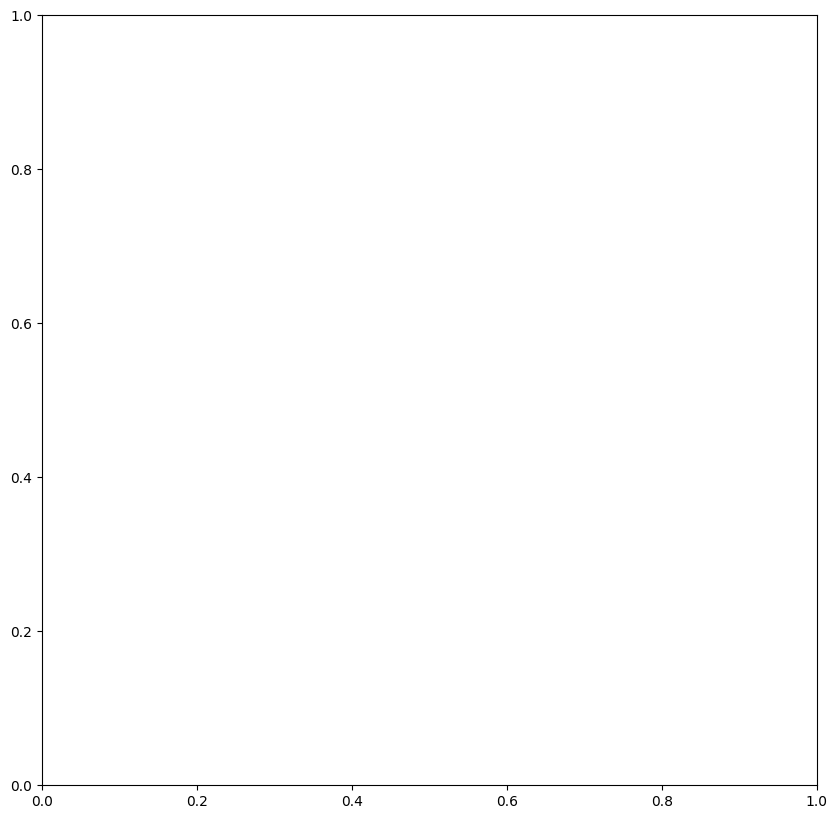

interactive(children=(IntSlider(value=50, description='slice_idx', min=1), Output()), _dom_classes=('widget-in…

In [6]:

if 'VolumeVisualizer' in sys.modules:
    importlib.reload(VV)
else:
    print("Module not found in sys.modules. Importing for the first time.")
    import loc_utils.VolumeVisualizer as VV  # Re-import if not found

# Reload the module

viz=VV(volume,mask)

In [7]:
#plot_multiple_kde(df)
volume_resampled_dir=r'D:\Image_Processing_Demo\sample_data\MRI_data\resampled\volumes'
mask_resampled_dir=r'D:\Image_Processing_Demo\sample_data\MRI_data\resampled\labels'

In [8]:

process_utils.resample_patient_data(df,volume_resampled_path=volume_resampled_dir,mask_resampled_path=mask_resampled_dir,resample_to=[1,1,1])

Processing patients:   0%|          | 0/3 [00:00<?, ?it/s]

Processing patient ID: 349081
349081_AXIAL_HASTE.nii
D:\Image_Processing_Demo\sample_data\MRI_data\resampled\volumes\349081_AXIAL_HASTE_resampled.nii.gz
Resampling D:\Image_Processing_Demo\sample_data\MRI_data\volumes\349081_AXIAL_HASTE.nii.gz...
OG Size: (320, 240, 95)
OG Space: (1.1875, 1.1875, 4.0)
resampled_size: (380, 285, 380)
resampled_spacing: (1.0, 1.0, 1.0)


Processing patients:  33%|███▎      | 1/3 [00:01<00:03,  1.57s/it]

Saved to D:\Image_Processing_Demo\sample_data\MRI_data\resampled\volumes\349081_AXIAL_HASTE_resampled.nii.gz
D:\Image_Processing_Demo\sample_data\MRI_data\resampled\labels\349081_AX-HASTE-ng-label_resampled.nii.gz
Resampling D:\Image_Processing_Demo\sample_data\MRI_data\labels\349081_AX-HASTE-ng-label.nii.gz...
OG Size: (320, 240, 95)
OG Space: (1.1875, 1.1875, 4.0)
resampled_size: (380, 285, 380)
resampled_spacing: (1.0, 1.0, 1.0)
Saved to D:\Image_Processing_Demo\sample_data\MRI_data\resampled\labels\349081_AX-HASTE-ng-label_resampled.nii.gz
Processing patient ID: 349101
349101_AXIAL_HASTE.nii
D:\Image_Processing_Demo\sample_data\MRI_data\resampled\volumes\349101_AXIAL_HASTE_resampled.nii.gz
Resampling D:\Image_Processing_Demo\sample_data\MRI_data\volumes\349101_AXIAL_HASTE.nii.gz...
OG Size: (256, 232, 90)
OG Space: (1.09375, 1.09375, 4.0)
resampled_size: (280, 254, 360)
resampled_spacing: (1.0, 1.0, 1.0)


Processing patients:  67%|██████▋   | 2/3 [00:02<00:01,  1.26s/it]

Saved to D:\Image_Processing_Demo\sample_data\MRI_data\resampled\volumes\349101_AXIAL_HASTE_resampled.nii.gz
D:\Image_Processing_Demo\sample_data\MRI_data\resampled\labels\349101_AX-HASTE-ng-label_resampled.nii.gz
Resampling D:\Image_Processing_Demo\sample_data\MRI_data\labels\349101_AX-HASTE-ng-label.nii.gz...
OG Size: (256, 232, 90)
OG Space: (1.09375, 1.09375, 4.0)
resampled_size: (280, 254, 360)
resampled_spacing: (1.0, 1.0, 1.0)
Saved to D:\Image_Processing_Demo\sample_data\MRI_data\resampled\labels\349101_AX-HASTE-ng-label_resampled.nii.gz
Processing patient ID: 349102
349102_AXIAL_HASTE.nii
D:\Image_Processing_Demo\sample_data\MRI_data\resampled\volumes\349102_AXIAL_HASTE_resampled.nii.gz
Resampling D:\Image_Processing_Demo\sample_data\MRI_data\volumes\349102_AXIAL_HASTE.nii.gz...
OG Size: (320, 256, 100)
OG Space: (1.03125, 1.03125, 4.0)
resampled_size: (330, 264, 400)
resampled_spacing: (1.0, 1.0, 1.0)


Processing patients: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]

Saved to D:\Image_Processing_Demo\sample_data\MRI_data\resampled\volumes\349102_AXIAL_HASTE_resampled.nii.gz
D:\Image_Processing_Demo\sample_data\MRI_data\resampled\labels\349102_AX-HASTE-ng-label_resampled.nii.gz
Resampling D:\Image_Processing_Demo\sample_data\MRI_data\labels\349102_AX-HASTE-ng-label.nii.gz...
OG Size: (320, 256, 100)
OG Space: (1.03125, 1.03125, 4.0)
resampled_size: (330, 264, 400)
resampled_spacing: (1.0, 1.0, 1.0)
Saved to D:\Image_Processing_Demo\sample_data\MRI_data\resampled\labels\349102_AX-HASTE-ng-label_resampled.nii.gz


In [9]:
substring_vol_res = ['HASTE_resampled.nii.gz']
substring_label_res = ['HASTE-ng-label_resampled.nii.gz']
df_resampled = process_utils.directory_scan(volume_resampled_dir,mask_resampled_dir, substring_vol_res,substring_label_res)

print(df_resampled['Volumes'].values[0])

D:\Image_Processing_Demo\sample_data\MRI_data\resampled\volumes\349081_AXIAL_HASTE_resampled.nii.gz


In [10]:
volume, mask=process_utils.pull_data_pid(df_resampled,patient_id)



D:\Image_Processing_Demo\sample_data\MRI_data\resampled\volumes\349102_AXIAL_HASTE_resampled.nii.gz
D:\Image_Processing_Demo\sample_data\MRI_data\resampled\labels\349102_AX-HASTE-ng-label_resampled.nii.gz


2024-10-01 17:39:28,892 - root - INFO - 
<class 'nibabel.nifti1.Nifti1Image'>
data shape (330, 264, 400)
affine:
[[  -1.           -0.            0.          154.0418396 ]
 [  -0.            1.           -0.         -126.8928833 ]
 [   0.            0.            1.         -309.40197754]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 330 264 400   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max   

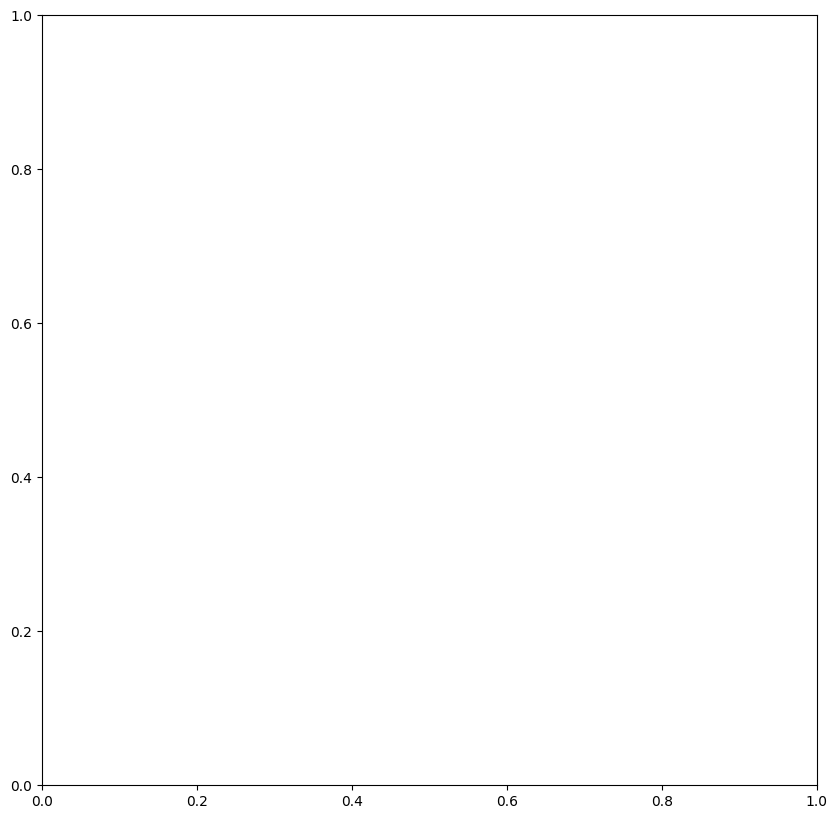

interactive(children=(IntSlider(value=200, description='slice_idx', max=400, min=1), Output()), _dom_classes=(…

In [11]:
volume_np=volume.get_fdata()
volume_shape=volume_np.shape
#logger.info(volume_np.shape)
logger.info(volume)
#logger.info(mask)
mask_np=mask.get_fdata()
#Note check orient after resampling often does not work given the resampling so check visually
viz=VolumeVisualizer(volume,mask)


In [12]:
volume_BFC_dir=r'D:\Image_Processing_Demo\sample_data\MRI_data\BFC'
importlib.reload(process_utils)
process_utils.BFC_patient_data(df_resampled,BF_path=volume_BFC_dir,bins=20)


d:\Image_Processing_Demo\loc_utils\process_utils.py:245: UserWarning: This processing step will convert all images to type Float 32
  warnings.warn('This processing step will convert all images to type Float 32')
Processing patients:   0%|          | 0/3 [00:00<?, ?it/s]

Processing patient ID: 349081
D:\Image_Processing_Demo\sample_data\MRI_data\BFC\349081_AXIAL_HASTE_resampled_BF.nii.gz
Loading input image from D:\Image_Processing_Demo\sample_data\MRI_data\resampled\volumes\349081_AXIAL_HASTE_resampled.nii.gz...


Processing patients:   0%|          | 0/3 [00:00<?, ?it/s]

Creating mask using Li thresholding...


RuntimeError: Error generating paths for patient 349081: Error during bias field correction: cannot access local variable 'shrunk_image' where it is not associated with a value.

In [ ]:
volume_BFC_dir=r'D:\Image_Processing_Demo\sample_data\MRI_data\BFC'
mask_resampled_dir=r'D:\Image_Processing_Demo\sample_data\MRI_data\resampled\labels'
substring_vol = ['HASTE_resampled_BF.nii.gz']
substring_label = ['HASTE-ng-label_resampled.nii.gz']
df_BFC = directory_scan(volume_resampled_dir,mask_resampled_dir, substring_vol_res,substring_label_res)



volume, mask=pull_data_pid(df_BFC,patient_id)
volume_np=volume.get_fdata()
volume_shape=volume_np.shape
#logger.info(volume_np.shape)
logger.info(volume)
#logger.info(mask)
mask_np=mask.get_fdata()
#Note check orient after resampling often does not work given the resampling so check visually

visualize_volume_slices(volume_np=volume_np,mask=mask_np)
